/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


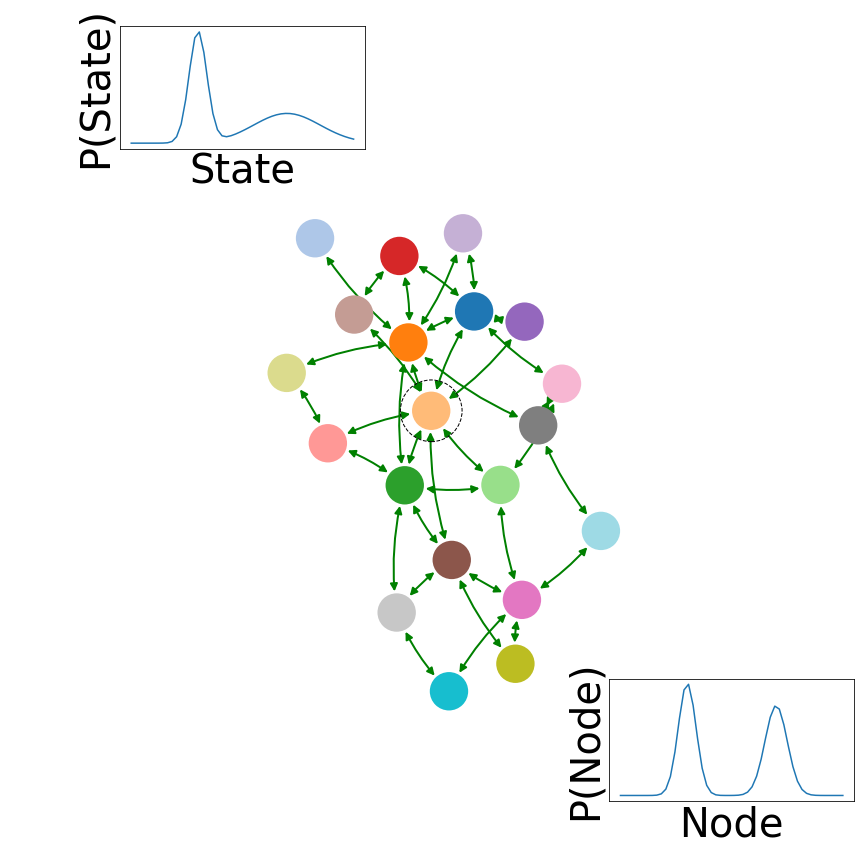

In [6]:
# %matplotlib qt5 
import sys
sys.path.insert(0, '../')
from Utils import plotting as plotz
import matplotlib.pyplot as plt, numpy as np, networkx as nx

g = nx.barabasi_albert_graph(20, 2)
pos = nx.spring_layout(g)
fig, ax = plt.subplots(figsize = (15, 15))


from matplotlib.patches import Circle

from scipy import spatial

p    = np.array(list(pos.values()))
ch   = spatial.ConvexHull(p)
cent = p[ch.vertices].mean(0)
s    = spatial.distance.pdist(p[ch.vertices])
rad  = s.mean()


# ax.add_artist(Circle(cent, radius = rad, fill = False, linewidth = 2, edgecolor = 'k', linestyle = 'dashed'))
# ax.scatter(*[[i] for i in cent], s =, color = 'k')
plotz.addGraphPretty(g, ax = ax, positions = pos, annotate = dict(annotate = False))

idx = 1.5
ax.set(xlim = (-rad * idx, rad * idx), ylim = (-rad * idx, rad * idx))


x = np.linspace(-5, 5)
from scipy import stats 
y = stats.norm.pdf(x, 2, 1.5)
y += stats.norm.pdf(x, -2, .4)

locofaxes = (0.1, .85)
inset = ax.axes.inset_axes((*locofaxes, .3, .15))
inset.plot(x, y)
inset.set(xticks = [], yticks = [])
inset.set_xlabel('State', fontsize = 40)
inset.set_ylabel('P(State)', fontsize = 40)


# ax.annotate('', xy = (locofaxes[0] + .15, locofaxes[1] - .035), \
#             xytext = (locofaxes[0] + 0.15, locofaxes[1] - .10),\
#             xycoords = 'axes fraction',\
#            arrowprops = dict(facecolor = 'black',  connectionstyle = f'arc3,rad={- .1 *np.pi}'),\
#            )

# inset node probabilities
loc2 = (0.7, 0.05)
inset = ax.axes.inset_axes((*loc2, .3, .15))


y = stats.norm.pdf(x, 2, .5)
y += stats.norm.pdf(x, -2, .4)
inset.plot(x, y)
inset.set(xticks = [], yticks = [])
inset.set_xlabel('Node', fontsize = 40)
inset.set_ylabel('P(Node)', fontsize = 40)


a   = (p - cent)
tar = ((a[(a[:, 0] < 0) * (a[:, 1] < 0) ])**2).sum(1).argmax()
tar = a[tar]

idx = ((p - tar)**2).sum(1).argmin()
tar = p[idx]

ax.axis('off')
ax.add_artist(Circle(tar, radius = 0.12, linestyle = 'dashed', edgecolor = 'k', fill = 0))

extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('../../thesis/presentation/figures/inf_dyn.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()

array([[-0.22086317, -0.90550753],
       [-0.10991217, -0.23270412],
       [-0.59163228, -0.33181587]])